
# Document Summary

This Jupyter Notebook demonstrates the process of data preprocessing, model training, and evaluation using a dataset of Nifty 500 companies.

## Steps Involved:

1. **Importing the Libraries**:
    - Import necessary libraries such as pandas, matplotlib, numpy, and scikit-learn.

2. **Loading the Dataset**:
    - Load the dataset from a CSV file named `nifty_500.csv`.

3. **Conversion to Numerical**:
    - Convert specific columns to numeric data types.
    - Apply one-hot encoding to categorical columns.
    - Drop unnecessary columns.

4. **Handling Missing Values**:
    - Use `SimpleImputer` to fill missing values with the median.
    - Confirm that there are no missing values left.

5. **Splitting the Dataset and Training the Model**:
    - Split the dataset into training and testing sets.
    - Train a Linear Regression model.
    - Predict and visualize the results.
    - Calculate and print the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).


## Importing the libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('nifty_500.csv')
dataset


,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Zensar Technolgies Ltd.,ZENSARTECH,Information Technology,EQ,273.15,273.55,268.40,272.10,270.00,-2.10,-0.77,186578,5.046748e+07,587.00,246.65,-12.61,-11.02
497,ZF Commercial Vehicle Control Systems India Ltd.,ZFCVINDIA,Automobile and Auto Components,EQ,7748.00,7900.00,7525.30,7716.60,7680.00,-36.60,-0.47,12790,9.884624e+07,8780.05,6793.30,-,1.43
498,Zomato Ltd.,ZOMATO,Consumer Services,EQ,54.15,56.70,52.55,53.85,56.00,2.15,3.99,112078641,6.193466e+09,169.00,50.05,-,-27.86
499,Zydus Lifesciences Ltd.,ZYDUSLIFE,Healthcare,EQ,356.90,364.05,354.30,357.00,364.00,7.00,1.96,862373,3.100145e+08,651.90,319.00,-,-5.64


## Conversion to Numerical

In [6]:
convert = ["Change", "Percentage Change", "365 Day Percentage Change", "30 Day Percentage Change"]
for col in convert:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

dataset = pd.get_dummies(dataset, columns=["Industry", "Series"], drop_first=True)

dataset.drop(columns=["Company Name", "Symbol"], inplace=True)
dataset

,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,...,Industry_Information Technology,Industry_Media Entertainment & Publication,Industry_Metals & Mining,Industry_Oil Gas & Consumable Fuels,Industry_Power,Industry_Realty,Industry_Services,Industry_Telecommunication,Industry_Textiles,Series_EQ
0,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,...,False,False,False,False,False,False,False,False,False,True
1,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,...,False,False,False,False,False,False,False,False,False,True
2,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,...,False,False,False,False,False,False,False,False,False,True
3,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,...,False,False,False,False,False,False,False,False,False,True
4,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,273.15,273.55,268.40,272.10,270.00,-2.10,-0.77,186578,5.046748e+07,587.00,...,True,False,False,False,False,False,False,False,False,True
497,7748.00,7900.00,7525.30,7716.60,7680.00,-36.60,-0.47,12790,9.884624e+07,8780.05,...,False,False,False,False,False,False,False,False,False,True
498,54.15,56.70,52.55,53.85,56.00,2.15,3.99,112078641,6.193466e+09,169.00,...,False,False,False,False,False,False,False,False,False,True
499,356.90,364.05,354.30,357.00,364.00,7.00,1.96,862373,3.100145e+08,651.90,...,False,False,False,False,False,False,False,False,False,True


## Confirming for missing values if any

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)
dataset.fillna(dataset.median(numeric_only=True), inplace=True)
total_missing_values = dataset.isnull().sum().sum()
total_missing_values
dataset

,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,...,Industry_Information Technology,Industry_Media Entertainment & Publication,Industry_Metals & Mining,Industry_Oil Gas & Consumable Fuels,Industry_Power,Industry_Realty,Industry_Services,Industry_Telecommunication,Industry_Textiles,Series_EQ
0,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159.0,8.965357e+07,27800.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782.0,1.262731e+07,749.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704.0,2.907728e+08,3340.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053.0,2.210935e+08,2487.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396.0,2.346770e+08,23934.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,273.15,273.55,268.40,272.10,270.00,-2.10,-0.77,186578.0,5.046748e+07,587.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
497,7748.00,7900.00,7525.30,7716.60,7680.00,-36.60,-0.47,12790.0,9.884624e+07,8780.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
498,54.15,56.70,52.55,53.85,56.00,2.15,3.99,112078641.0,6.193466e+09,169.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
499,356.90,364.05,354.30,357.00,364.00,7.00,1.96,862373.0,3.100145e+08,651.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Splitting the dataset into the Training set and training the model

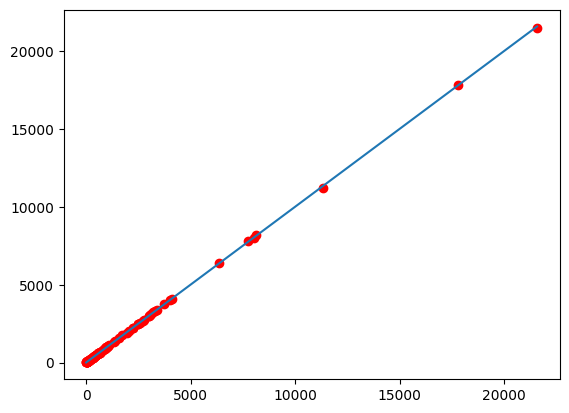

9.04407355928922
16.963576235381776


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = dataset.drop(columns=["Last Traded Price"])
y = dataset["Last Traded Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred,color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(mae) 
print(rmse)
